# LEFT TO DO
https://medium.com/analytics-vidhya/how-to-measure-the-non-linear-correlation-between-multiple-variables-804d896760b8
Multi-Variate Non-Linear Coorelation Matrix

In [33]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [38]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../Wisconsin_Database/wdbc.data', header=None)
df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':1 ,'B':0})
print(df.shape)

(569, 32)


Correlation Matrix Size: (32, 32)
Number of Entries: 1024
Correlations Over 90: 74
Correlations Over 80: 120


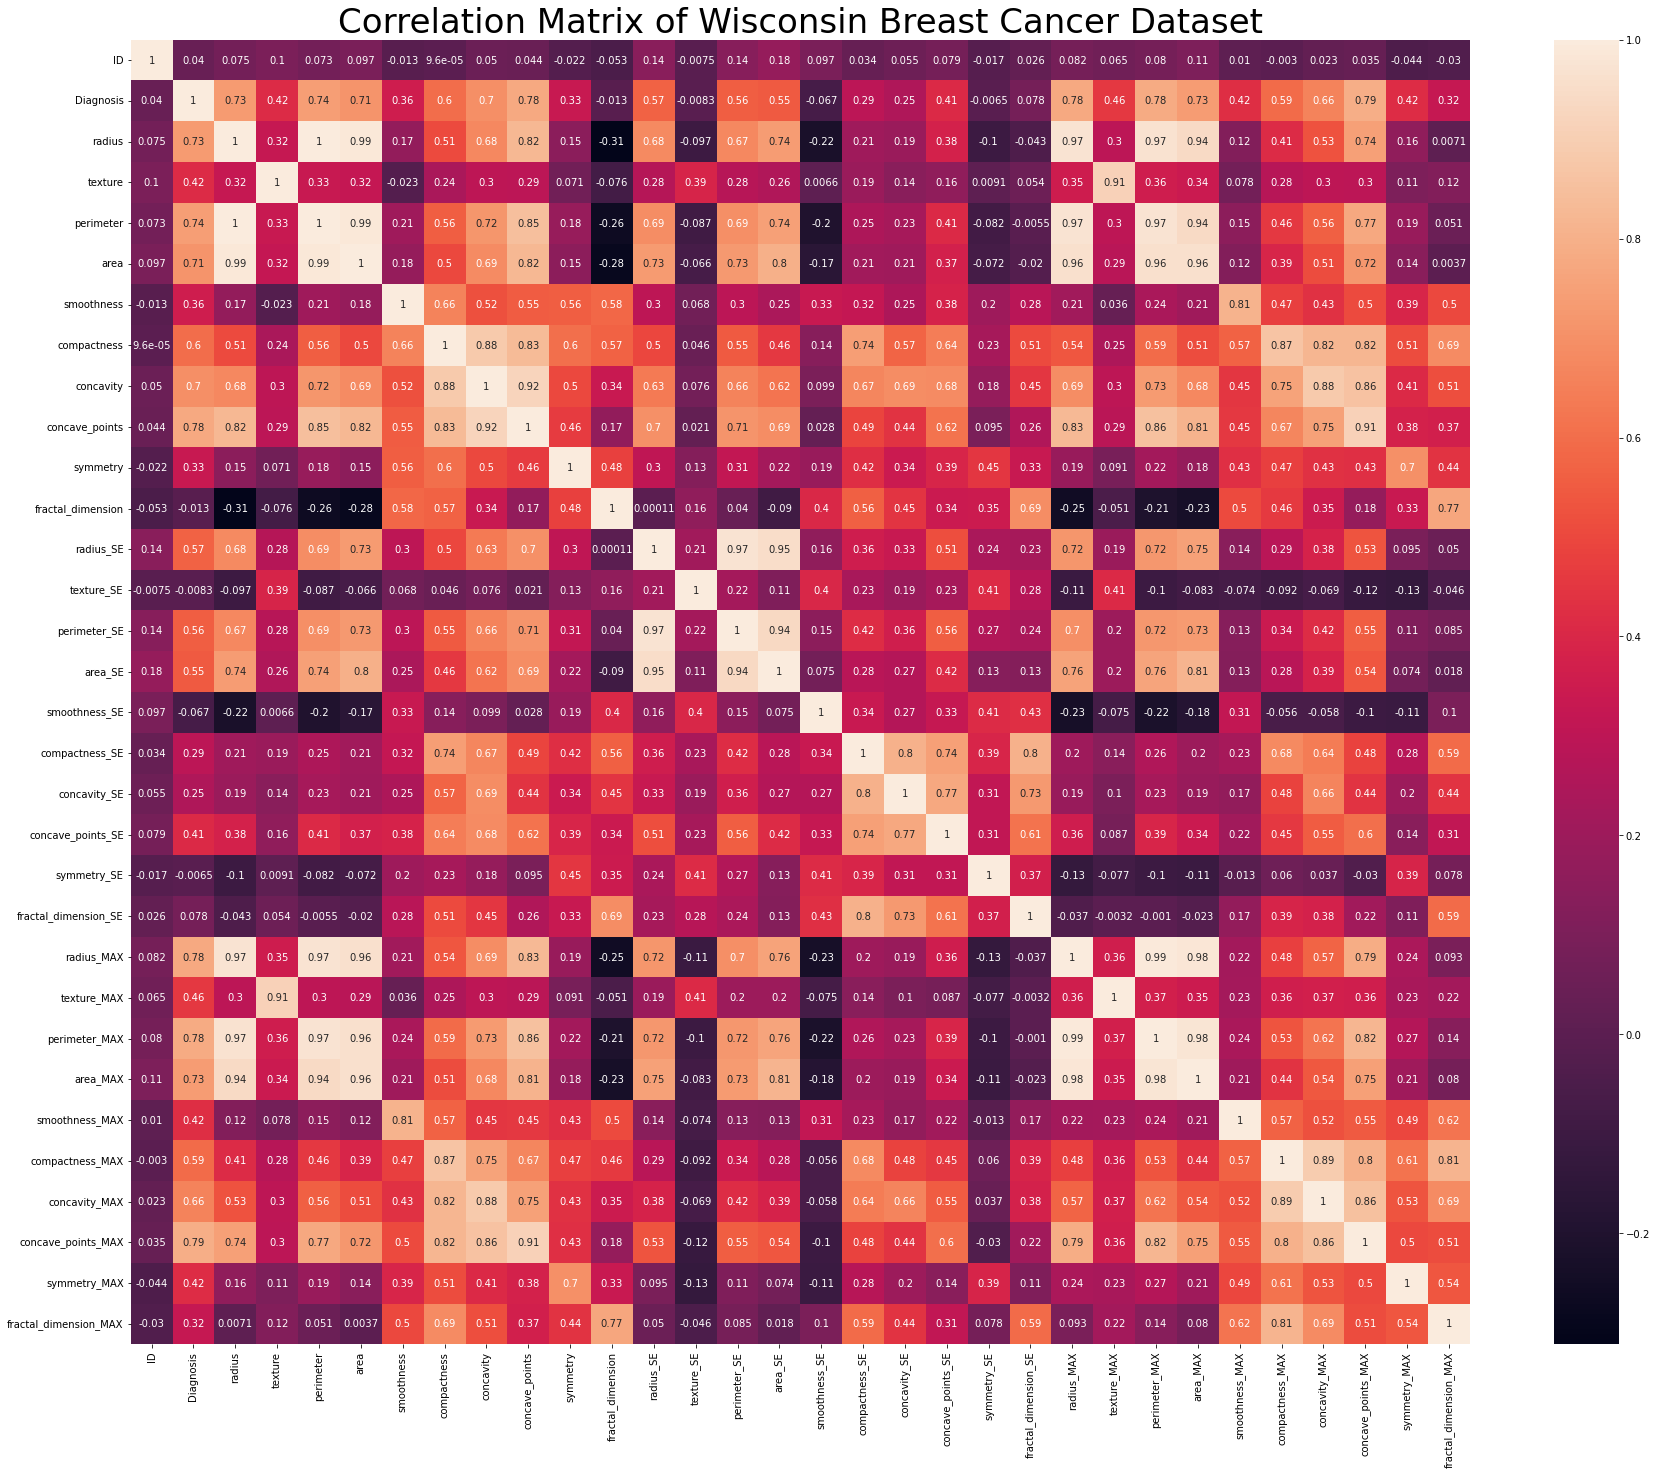

In [54]:
corrMatrix = df.corr()
numbersAbove90 = 0
numbersAbove80 = 0
for index, row in corrMatrix.iterrows():
    for cell in row:
        if cell > 0.9:
            numbersAbove90 += 1
        if cell > 0.8:
            numbersAbove80 += 1

print('Correlation Matrix Size: {}'.format(corrMatrix.shape))
print('Number of Entries: {}'.format(corrMatrix.shape[0] * corrMatrix.shape[1]))
print('Correlations Over 90: {}'.format(numbersAbove90))
print('Correlations Over 80: {}'.format(numbersAbove80))
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (30, 24)
plt.title('Correlation Matrix of Wisconsin Breast Cancer Dataset', fontdict={'fontsize': 34})
plt.show()


Correlation Matrix Size: (16, 16)
Number of Entries: 256
Correlations Over 90: 8
Correlations Over 80: 22


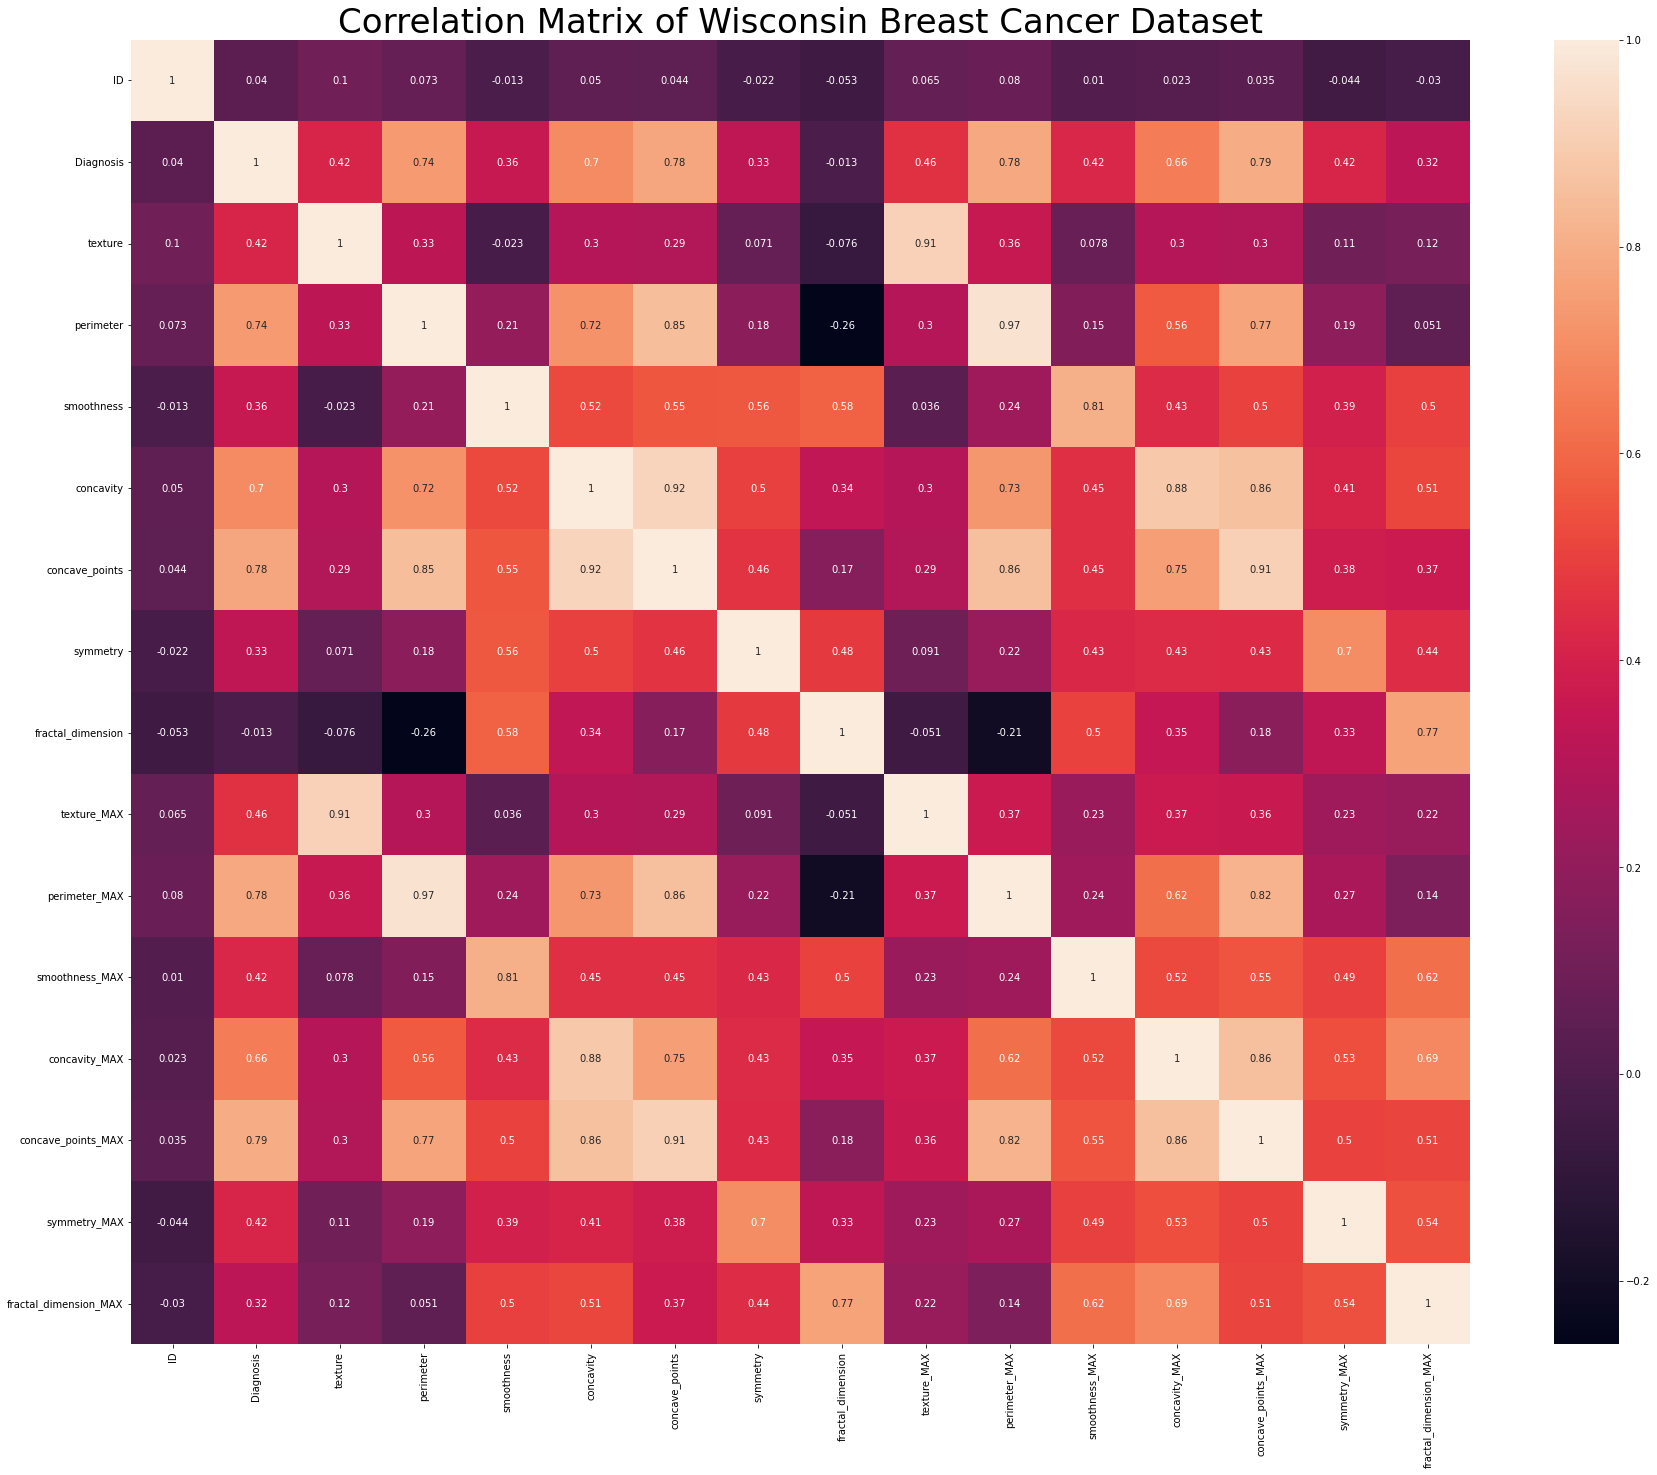

In [67]:
newCols = cols[:12] + cols[22:]     # Removes SE Values
newCols.remove('compactness')       # Compactness is a calculated value of Perimeter ^ 2 / Area
newCols.remove('compactness_MAX')
newCols.remove('radius')            # Radius has a correlation of 1 with peremiter
newCols.remove('radius_MAX')
newCols.remove('area')              # Radius has a correlation of 1 with peremiter
newCols.remove('area_MAX')          # Perimeter is also directly related to area
newDF = df[newCols]
corrMatrix = newDF.corr()
numbersAbove90 = 0
numbersAbove80 = 0
for index, row in corrMatrix.iterrows():
    for cell in row:
        if cell > 0.9:
            numbersAbove90 += 1
        if cell > 0.8:
            numbersAbove80 += 1

print('Correlation Matrix Size: {}'.format(corrMatrix.shape))
print('Number of Entries: {}'.format(corrMatrix.shape[0] * corrMatrix.shape[1]))
print('Correlations Over 90: {}'.format(numbersAbove90 - len(newCols)))
print('Correlations Over 80: {}'.format(numbersAbove80 - len(newCols)))
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (30, 24)
plt.title('Correlation Matrix of Wisconsin Breast Cancer Dataset', fontdict={'fontsize': 34})
plt.show()